In [2]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
import statsmodels.api as sm
import urllib2

s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)
%pylab inline

pl.rcParams['font.size'] = 20 

Populating the interactive namespace from numpy and matplotlib


In [3]:
mta = np.load('MTA_Fare.npy')

In [4]:
mta.shape

(600, 23, 194)

In [16]:
mta_allsum_types = np.nansum(mta, axis=0)
print (mta_allsum_types.shape)
mta_allsum_stations = np.nansum(mta, axis=1)
print (mta_allsum_stations.shape)

(23, 194)
(600, 194)


In [10]:
rng = pd.date_range('05/21/2010', periods=194, freq='W')
rng

DatetimeIndex(['2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27', '2010-07-04', '2010-07-11',
               '2010-07-18', '2010-07-25', 
               ...
               '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22',
               '2013-12-29', '2014-01-05', '2014-01-12', '2014-01-19',
               '2014-01-26', '2014-02-02'],
              dtype='datetime64[ns]', length=194, freq='W-SUN', tz=None)

In [112]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [49]:
df_mta_allsum_types = pd.DataFrame(mta_allsum_types)
df_mta_allsum_types = df_mta_allsum_types.transpose()
df_mta_allsum_types.set_index(rng)
df_mta_allsum_types['Date'] = rng

In [44]:
df_mta_allsum_stations = pd.DataFrame(mta_allsum_stations)
df_mta_allsum_stations = df_mta_allsum_stations.transpose()
df_mta_allsum_stations.set_index(rng)
df_mta_allsum_stations['Date'] = rng

In [41]:
df_mta_allsum_stations

Timestamp('2010-05-23 00:00:00', offset='W-SUN')

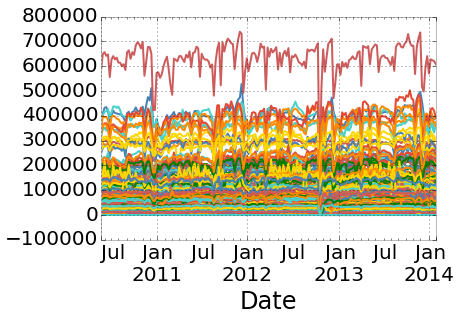

In [48]:
ax = df_mta_allsum_stations.plot(x = 'Date', legend = False)
# ax.set_xlabel("Week of Year", fontsize = 12)
# ax.set_ylabel("# of Users", fontsize = 12)

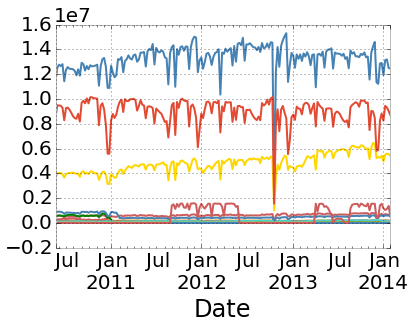

In [50]:
ax = df_mta_allsum_types.plot(x = 'Date', legend = False)

In [91]:
event = mta_allsum_stations > (mta_allsum_stations.mean() + 3*mta_allsum_stations.std())

In [85]:
df_event = pd.DataFrame(event)
df_event = df_event.transpose()
df_event.set_index(rng)
df_event['Date'] = rng

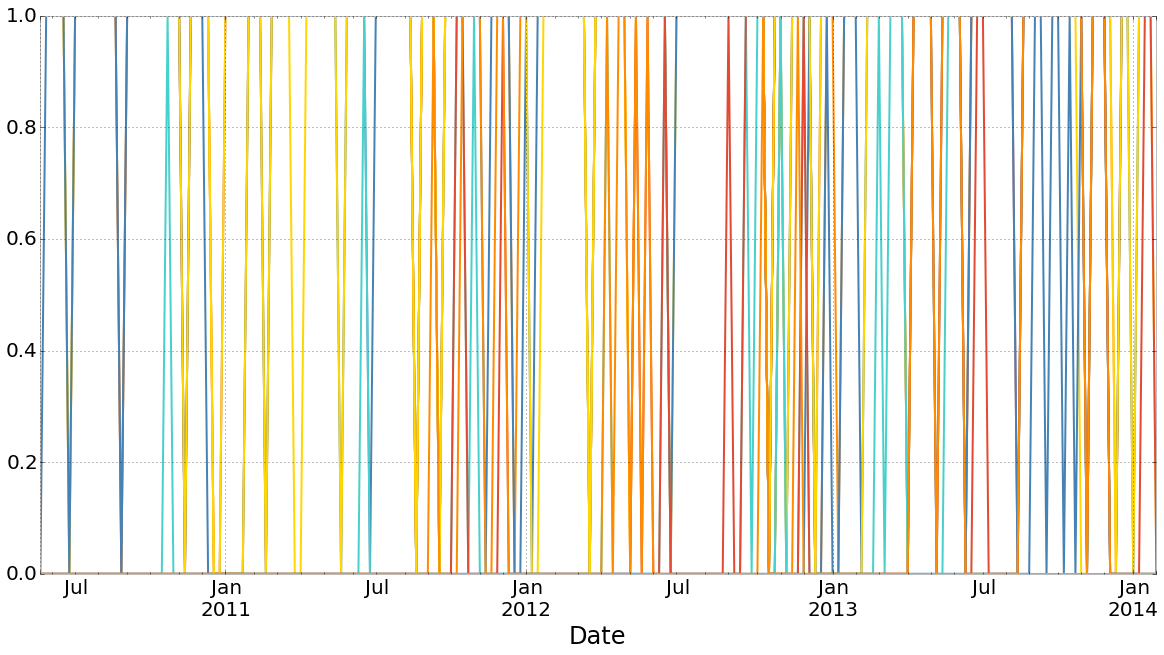

In [125]:
ax = df_event.plot(x = 'Date', legend = False, figsize = (20, 10))
pl.show()

## Each lines represents an unusual event in that week. They are usually before the January meaning we have a peak use for holiday seasons.

In [116]:
df_mta_allsum_types.drop('Date', axis=1, inplace=True)

In [118]:
df_mta_allsum_types.columns = ridetype

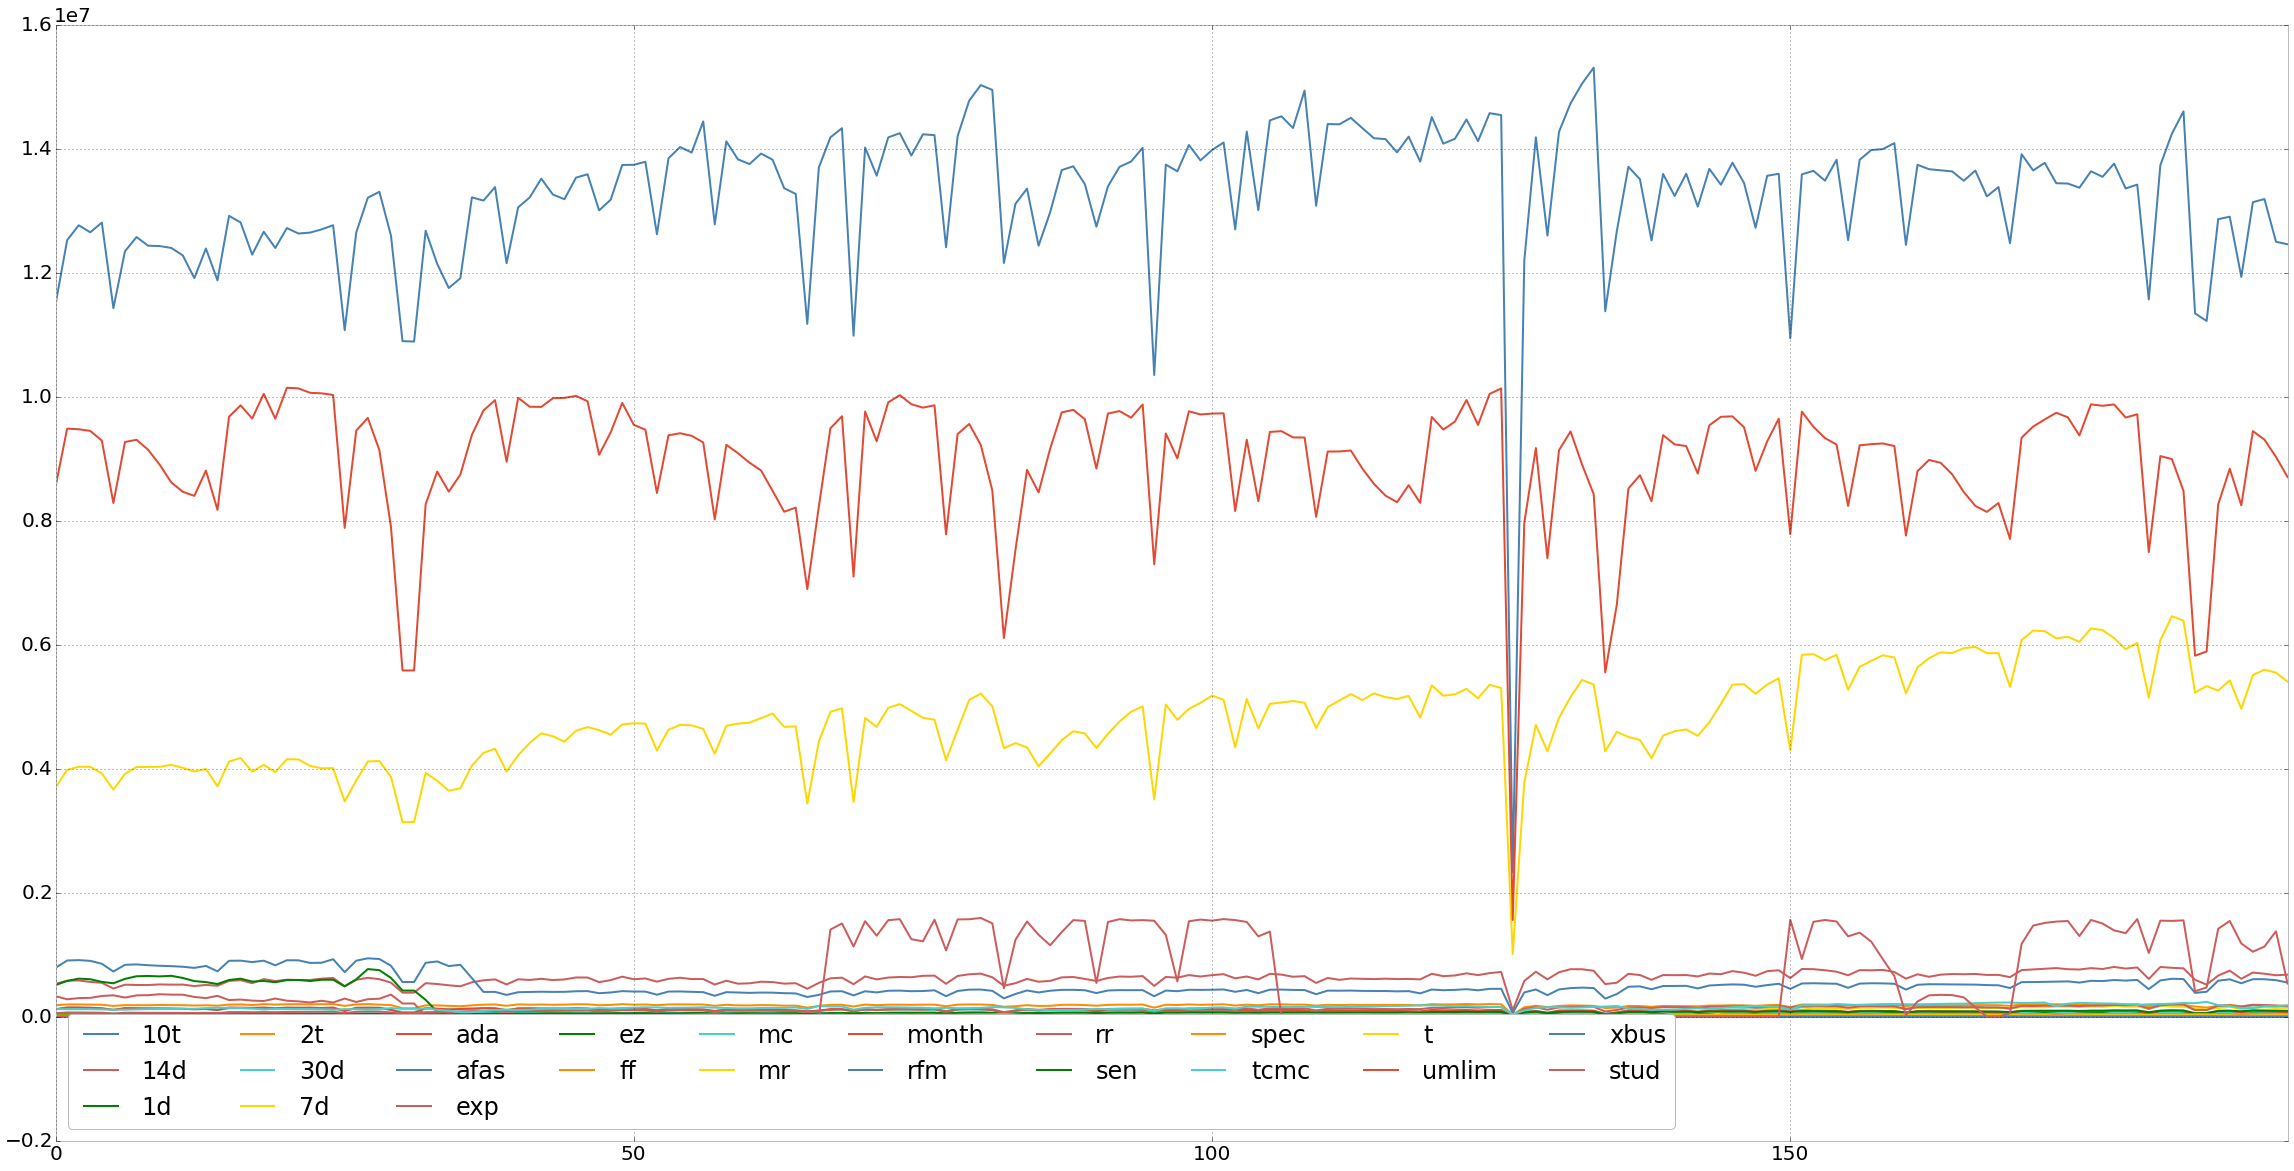

In [152]:
ax = df_mta_allsum_types.plot(use_index = True, figsize = (40, 20))
ax.legend(loc = 3, ncol = 10)
pl.show()

## Visually looking at our data we can see an increase in usage for 7days cards 

In [160]:
for i in ridetype:
    if df_mta_allsum_types[i][0] < df_mta_allsum_types[i][193]:
        print '%s usage is acsending' %i
    else:
        print '%s usage is descending' %i

10t usage is acsending
14d usage is acsending
1d usage is acsending
2t usage is descending
30d usage is acsending
7d usage is acsending
ada usage is acsending
afas usage is descending
exp usage is descending
ez usage is descending
ff usage is descending
mc usage is acsending
mr usage is acsending
month usage is descending
rfm usage is descending
rr usage is acsending
sen usage is acsending
spec usage is acsending
tcmc usage is acsending
t usage is acsending
umlim usage is acsending
xbus usage is acsending
stud usage is acsending


In [199]:
pd.rolling_mean(df_mta_allsum_types, 194)

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
fft = np.fft.rfft(mta)
np.fft.rfftfreq(194, 1)

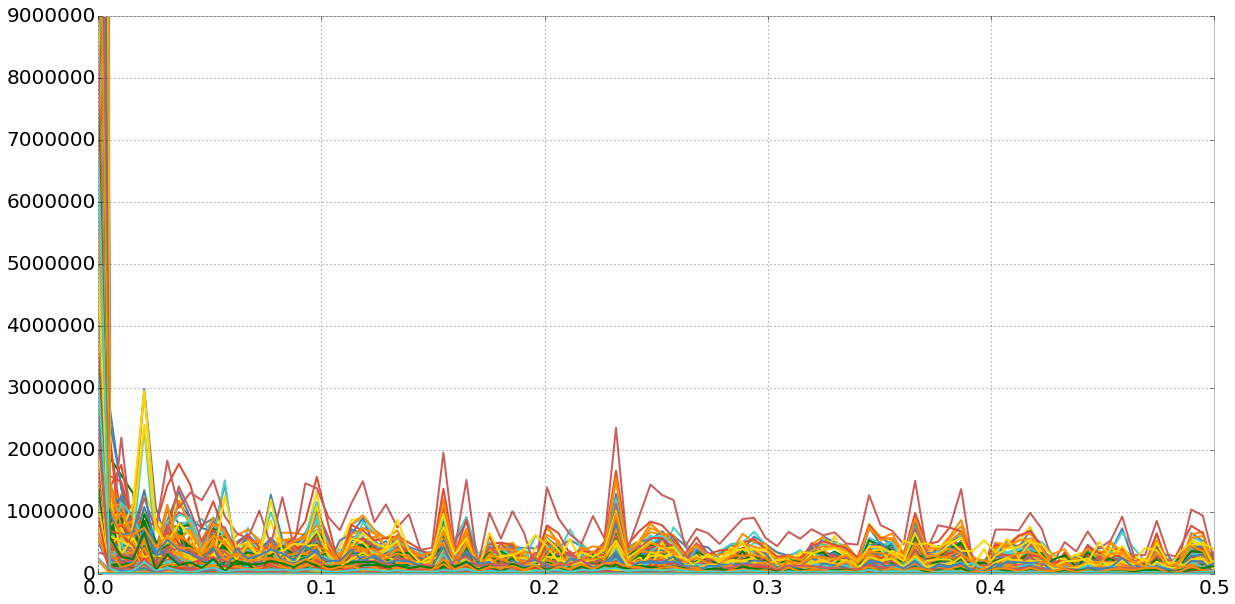

In [215]:
pl.figure(figsize = (20, 10))
test = np.abs(np.fft.rfft(mta_allsum_stations))
pl.plot(np.fft.rfftfreq(194, 1.0), test.transpose())
ylim( ymax = 9000000)
pl.show()

## The fourier transform has only done for the sum of all kind of swipes for each station.